# Customer Type and Behaviour Analysis on Advertisement

## **Customer Type and Behaviour Analysis on Advertisement**


### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/Mini Project And VIX/Mini Project/Mini Project 4/dataset/CSV/Clicked Ads Dataset.csv')
df.head()

Mounted at /content/drive


,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


### Descriptive Statistic

In [ ]:
# menampilkan informasi dasar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
# mengelompokan data
categoricals = df.select_dtypes(include='object').columns.tolist()
numericals = df.select_dtypes(include=('int64', 'float64')).columns.tolist()

In [ ]:
# melihat statistika dasar dataset
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
df[categoricals].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


### Univariate Analysis

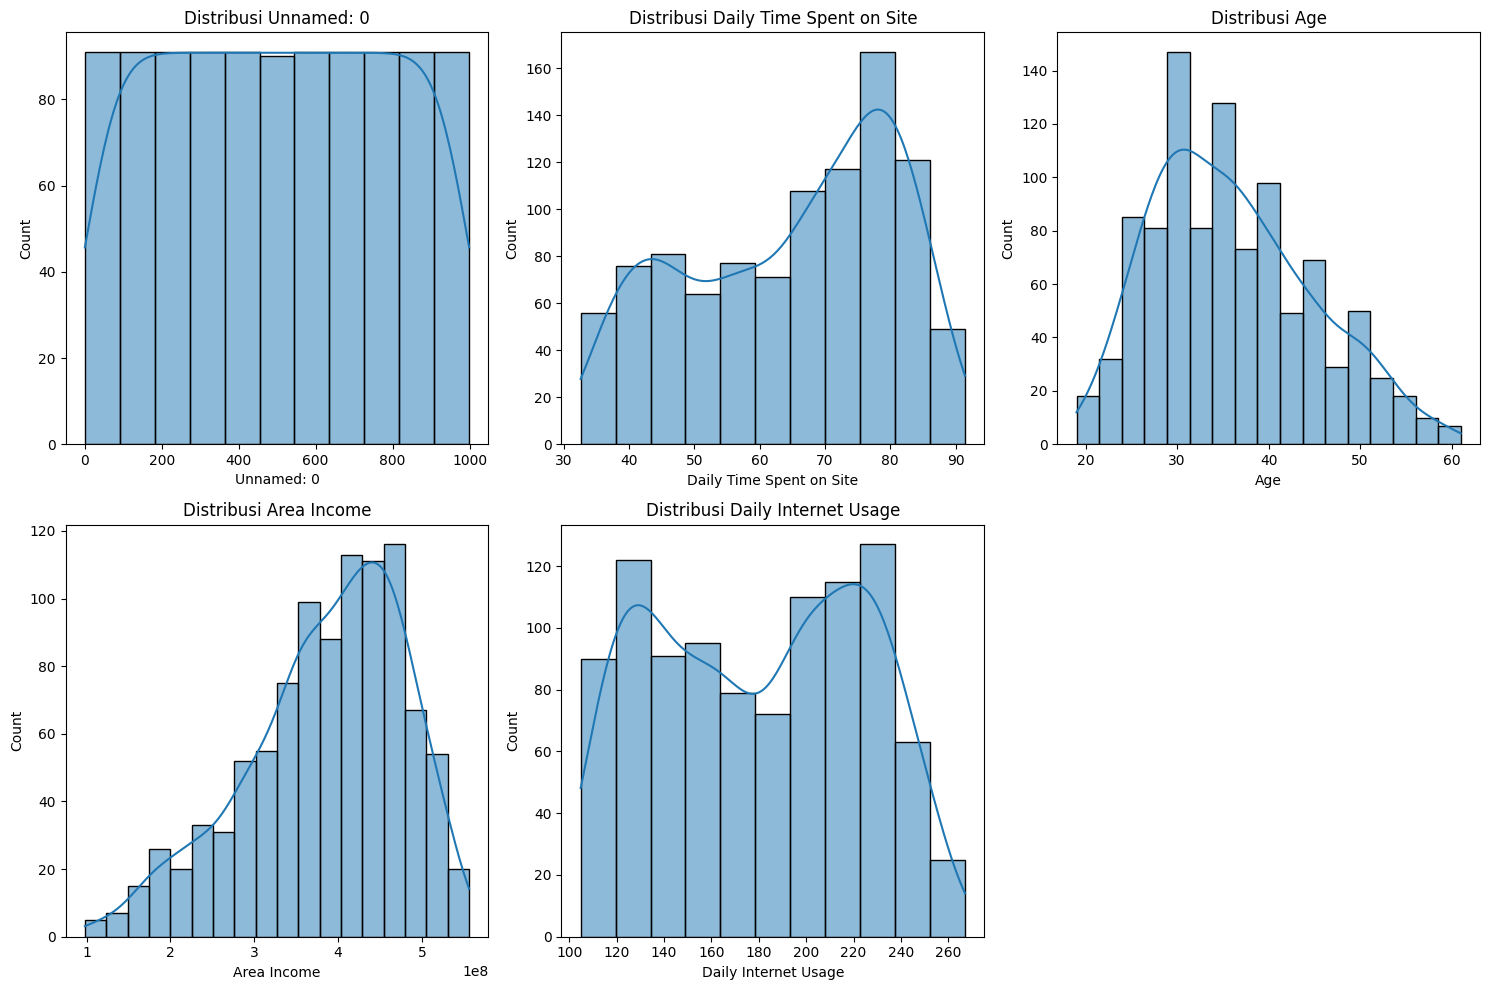

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Tentukan ukuran gambar
plt.figure(figsize=(15, 10))

# Buat objek GridSpec dengan 2 baris dan 3 kolom
grid = GridSpec(2, 3)

# Plot pertama (kolom 1, baris 1)
plt.subplot(grid[0, 0])
sns.histplot(df['Unnamed: 0'], kde=True)
plt.title('Distribusi Unnamed: 0')

# Plot kedua (kolom 2, baris 1)
plt.subplot(grid[0, 1])
sns.histplot(df['Daily Time Spent on Site'], kde=True)
plt.title('Distribusi Daily Time Spent on Site')

# Plot ketiga (kolom 3, baris 1)
plt.subplot(grid[0, 2])
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Age')

# Plot keempat (kolom 1, baris 2)
plt.subplot(grid[1, 0])
sns.histplot(df['Area Income'], kde=True)
plt.title('Distribusi Area Income')

# Plot kelima (kolom 2, baris 2)
plt.subplot(grid[1, 1])
sns.histplot(df['Daily Internet Usage'], kde=True)
plt.title('Distribusi Daily Internet Usage')

# Hapus spasi ekstra di sekitar subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


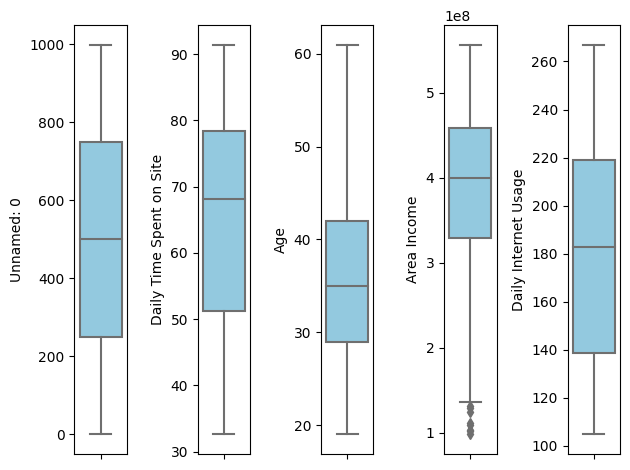

In [ ]:
# mencari outliers

import matplotlib.pyplot as plt
import seaborn as sns

features = numericals

for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color ='skyblue', orient = 'v')
  plt.tight_layout()

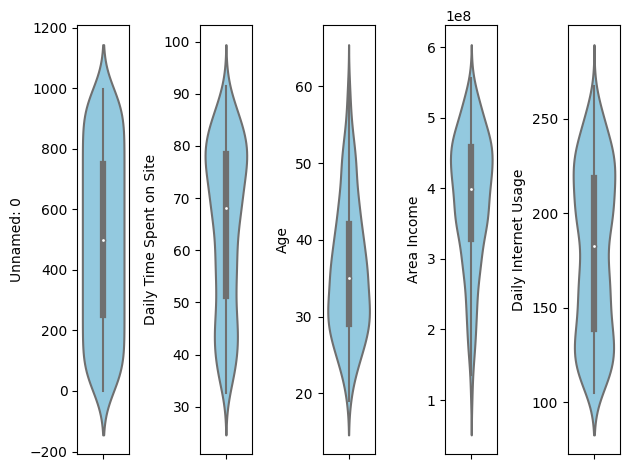

In [ ]:
# melihat sebaran data
features = numericals

for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.violinplot(y=df[features[i]], color ='skyblue')
  plt.tight_layout()

### Bivariate Analysis

In [ ]:
# Memisahkan data antara yang mengklik iklan ("Yes") dan yang tidak ("No")
clicked_yes = df[df['Clicked on Ad'] == 'Yes']
clicked_no = df[df['Clicked on Ad'] == 'No']

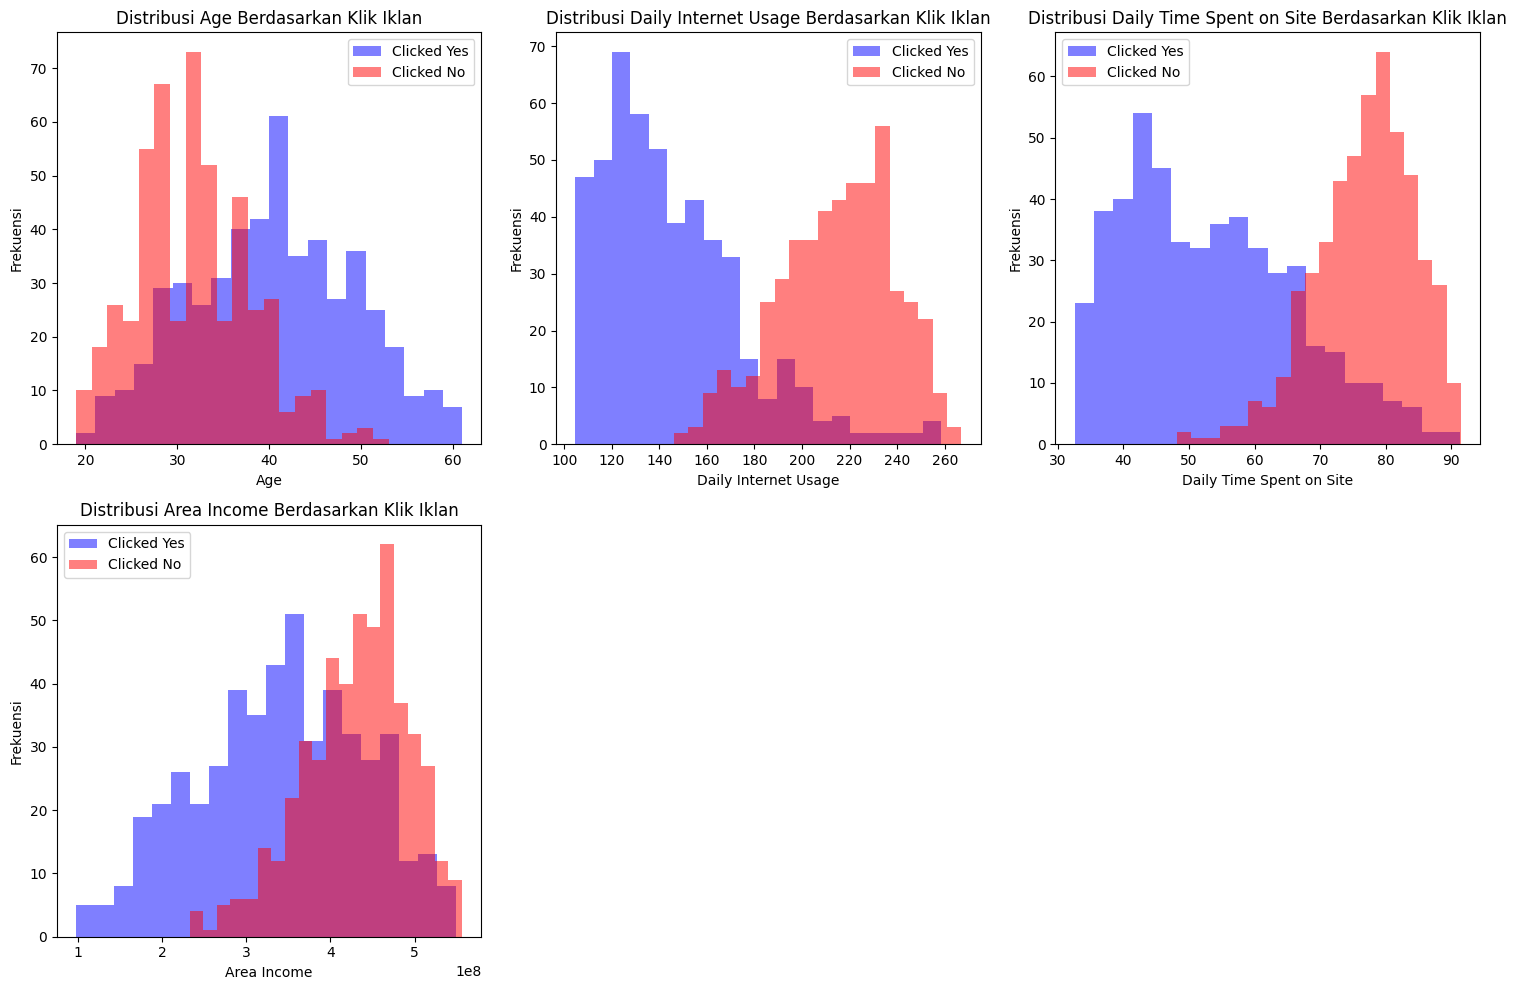

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Tentukan ukuran gambar
plt.figure(figsize=(15, 10))

# Buat objek GridSpec dengan 2 baris dan 3 kolom
grid = GridSpec(2, 3)

# distribusi Age dengan Clicked on Ad
plt.subplot(grid[0, 0])
plt.hist(clicked_yes['Age'], bins=20, alpha=0.5, color='blue', label='Clicked Yes')
plt.hist(clicked_no['Age'], bins=20, alpha=0.5, color='red', label='Clicked No')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.title('Distribusi Age Berdasarkan Klik Iklan')
plt.legend()

# Daily Internet Usage dengan Clicked on
plt.subplot(grid[0, 1])
plt.hist(clicked_yes['Daily Internet Usage'], bins=20, alpha=0.5, color='blue', label='Clicked Yes')
plt.hist(clicked_no['Daily Internet Usage'], bins=20, alpha=0.5, color='red', label='Clicked No')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Frekuensi')
plt.title('Distribusi Daily Internet Usage Berdasarkan Klik Iklan')
plt.legend()

# Daily Time Spent on Site dengan Clicked on
plt.subplot(grid[0, 2])
plt.hist(clicked_yes['Daily Time Spent on Site'], bins=20, alpha=0.5, color='blue', label='Clicked Yes')
plt.hist(clicked_no['Daily Time Spent on Site'], bins=20, alpha=0.5, color='red', label='Clicked No')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Frekuensi')
plt.title('Distribusi Daily Time Spent on Site Berdasarkan Klik Iklan')
plt.legend()

# Daily Internet Usage dengan Clicked on
plt.subplot(grid[1,0])
plt.hist(clicked_yes['Area Income'], bins=20, alpha=0.5, color='blue', label='Clicked Yes')
plt.hist(clicked_no['Area Income'], bins=20, alpha=0.5, color='red', label='Clicked No')
plt.xlabel('Area Income')
plt.ylabel('Frekuensi')
plt.title('Distribusi Area Income Berdasarkan Klik Iklan')
plt.legend()


# Hapus spasi ekstra di sekitar subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


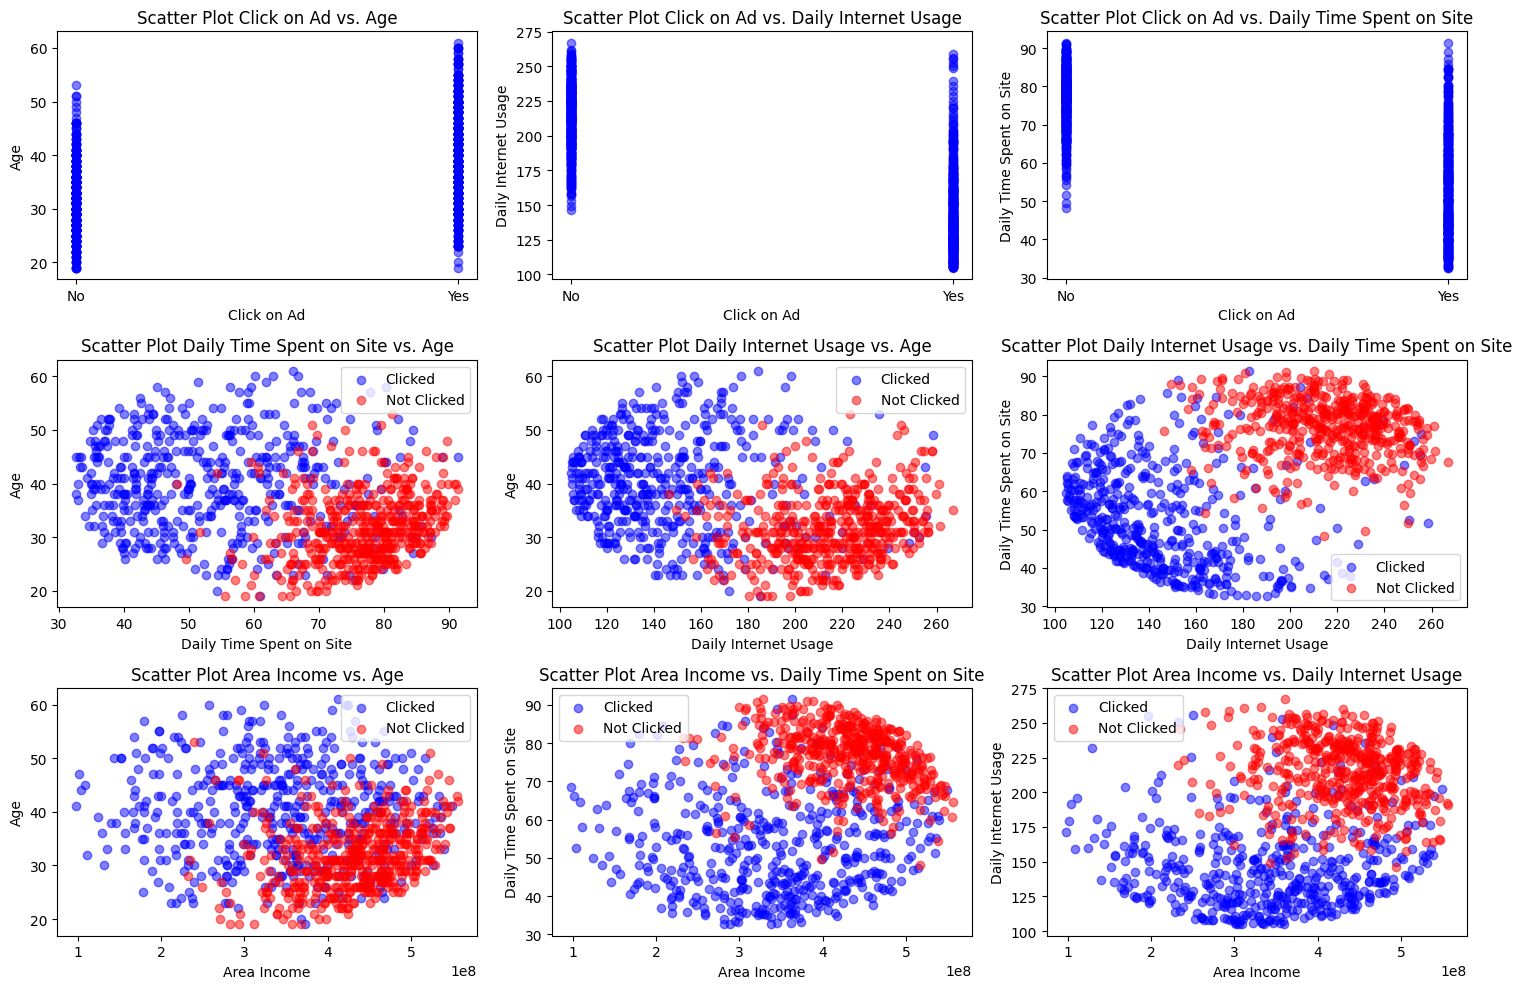

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Tentukan ukuran gambar
plt.figure(figsize=(15, 10))

# Buat objek GridSpec dengan 3 baris dan 3 kolom
grid = GridSpec(3, 3)

# kolerasi Clicked on Ad dengan Age
plt.subplot(grid[0, 0])
plt.scatter(df['Clicked on Ad'], df['Age'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Click on Ad')
plt.ylabel('Age')
plt.title('Scatter Plot Click on Ad vs. Age')

# kolerasi Clicked on Ad dengan Daily Internet Usage
plt.subplot(grid[0, 1])
plt.scatter(df['Clicked on Ad'], df['Daily Internet Usage'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Click on Ad')
plt.ylabel('Daily Internet Usage')
plt.title('Scatter Plot Click on Ad vs. Daily Internet Usage')

# kolerasi Clicked on Ad dengan Daily Time Spent on Site
plt.subplot(grid[0, 2])
plt.scatter(df['Clicked on Ad'], df['Daily Time Spent on Site'], marker='o', color='blue', alpha=0.5)
plt.xlabel('Click on Ad')
plt.ylabel('Daily Time Spent on Site')
plt.title('Scatter Plot Click on Ad vs. Daily Time Spent on Site')

# kolerasi Age dengan Daily Time Spent on Site
plt.subplot(grid[1, 0])
plt.scatter(clicked_yes['Daily Time Spent on Site'], clicked_yes['Age'], marker='o', color='blue', alpha=0.5, label='Clicked')
plt.scatter(clicked_no['Daily Time Spent on Site'], clicked_no['Age'], marker='o', color='red', alpha=0.5, label='Not Clicked')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Age')
plt.title('Scatter Plot Daily Time Spent on Site vs. Age')
plt.legend()

# kolerasi Age dengan Daily Internet Usage
plt.subplot(grid[1, 1])
plt.scatter(clicked_yes['Daily Internet Usage'], clicked_yes['Age'], marker='o', color='blue', alpha=0.5, label='Clicked')
plt.scatter(clicked_no['Daily Internet Usage'], clicked_no['Age'], marker='o', color='red', alpha=0.5, label='Not Clicked')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Age')
plt.title('Scatter Plot Daily Internet Usage vs. Age')
plt.legend()

# kolerasi Daily Internet Usage dengan Daily Time Spent on Site
plt.subplot(grid[1, 2])
plt.scatter(clicked_yes['Daily Internet Usage'], clicked_yes['Daily Time Spent on Site'], marker='o', color='blue', alpha=0.5, label='Clicked')
plt.scatter(clicked_no['Daily Internet Usage'], clicked_no['Daily Time Spent on Site'], marker='o', color='red', alpha=0.5, label='Not Clicked')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Daily Time Spent on Site')
plt.title('Scatter Plot Daily Internet Usage vs. Daily Time Spent on Site')
plt.legend()

# kolerasi Age dengan Area Income
plt.subplot(grid[2, 0])
plt.scatter(clicked_yes['Area Income'], clicked_yes['Age'], marker='o', color='blue', alpha=0.5, label='Clicked')
plt.scatter(clicked_no['Area Income'], clicked_no['Age'], marker='o', color='red', alpha=0.5, label='Not Clicked')
plt.xlabel('Area Income')
plt.ylabel('Age')
plt.title('Scatter Plot Area Income vs. Age')
plt.legend()

# kolerasi Daily Time Spent on Site dengan Area Income
plt.subplot(grid[2, 1])
plt.scatter(clicked_yes['Area Income'], clicked_yes['Daily Time Spent on Site'], marker='o', color='blue', alpha=0.5, label='Clicked')
plt.scatter(clicked_no['Area Income'], clicked_no['Daily Time Spent on Site'], marker='o', color='red', alpha=0.5, label='Not Clicked')
plt.xlabel('Area Income')
plt.ylabel('Daily Time Spent on Site')
plt.title('Scatter Plot Area Income vs. Daily Time Spent on Site')
plt.legend()

# kolerasi Daily Internet Usage dengan Area Income
plt.subplot(grid[2, 2])
plt.scatter(clicked_yes['Area Income'], clicked_yes['Daily Internet Usage'], marker='o', color='blue', alpha=0.5, label='Clicked')
plt.scatter(clicked_no['Area Income'], clicked_no['Daily Internet Usage'], marker='o', color='red', alpha=0.5, label='Not Clicked')
plt.xlabel('Area Income')
plt.ylabel('Daily Internet Usage')
plt.title('Scatter Plot Area Income vs. Daily Internet Usage')
plt.legend()

# Hapus spasi ekstra di sekitar subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


### multivariate analysis

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
# Data Preprocessing untuk kebutuhan heatmap

mapping_Clicked_on_Ad = { 'No' : 0, 'Yes' : 1 }
df_encoded  = pd.get_dummies(df_copy['Male'], prefix='Gender')

df_copy = pd.concat([df_copy, df_encoded], axis=1)
df_copy['Clicked on Ad'] = df_copy['Clicked on Ad'].map(mapping_Clicked_on_Ad)
df_copy.drop(['Male', 'Unnamed: 0'], axis=1, inplace=True)
df_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp,Clicked on Ad,city,province,category,Gender_Laki-Laki,Gender_Perempuan
0,68.95,35,432837300.0,256.09,3/27/2016 0:53,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,1
1,80.23,31,479092950.0,193.77,4/4/2016 1:39,0,Denpasar,Bali,Food,1,0
2,69.47,26,418501580.0,236.50,3/13/2016 20:35,0,Surabaya,Jawa Timur,Electronic,0,1
3,74.15,29,383643260.0,245.89,1/10/2016 2:31,0,Batam,Kepulauan Riau,House,1,0
4,68.37,35,517229930.0,225.58,6/3/2016 3:36,0,Medan,Sumatra Utara,Finance,0,1


<ipython-input-15-4da0427a483c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), cmap='Blues', annot = True, fmt = '.2f')


<Axes: >

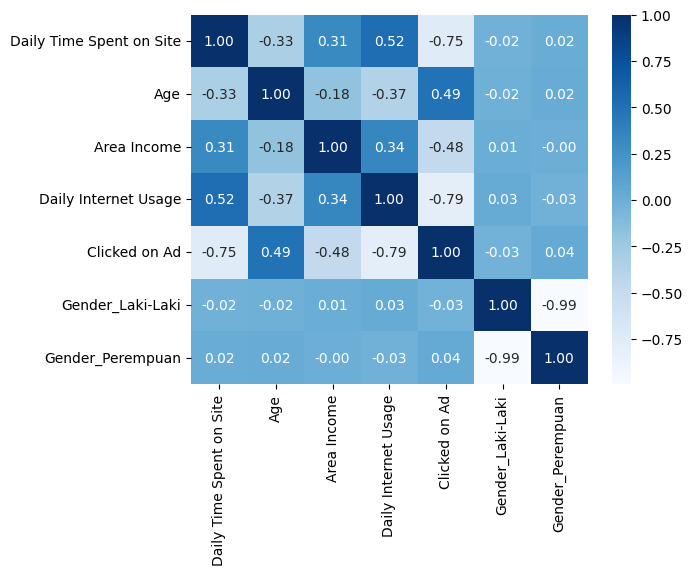

In [ ]:
sns.heatmap(df_copy.corr(), cmap='Blues', annot = True, fmt = '.2f')

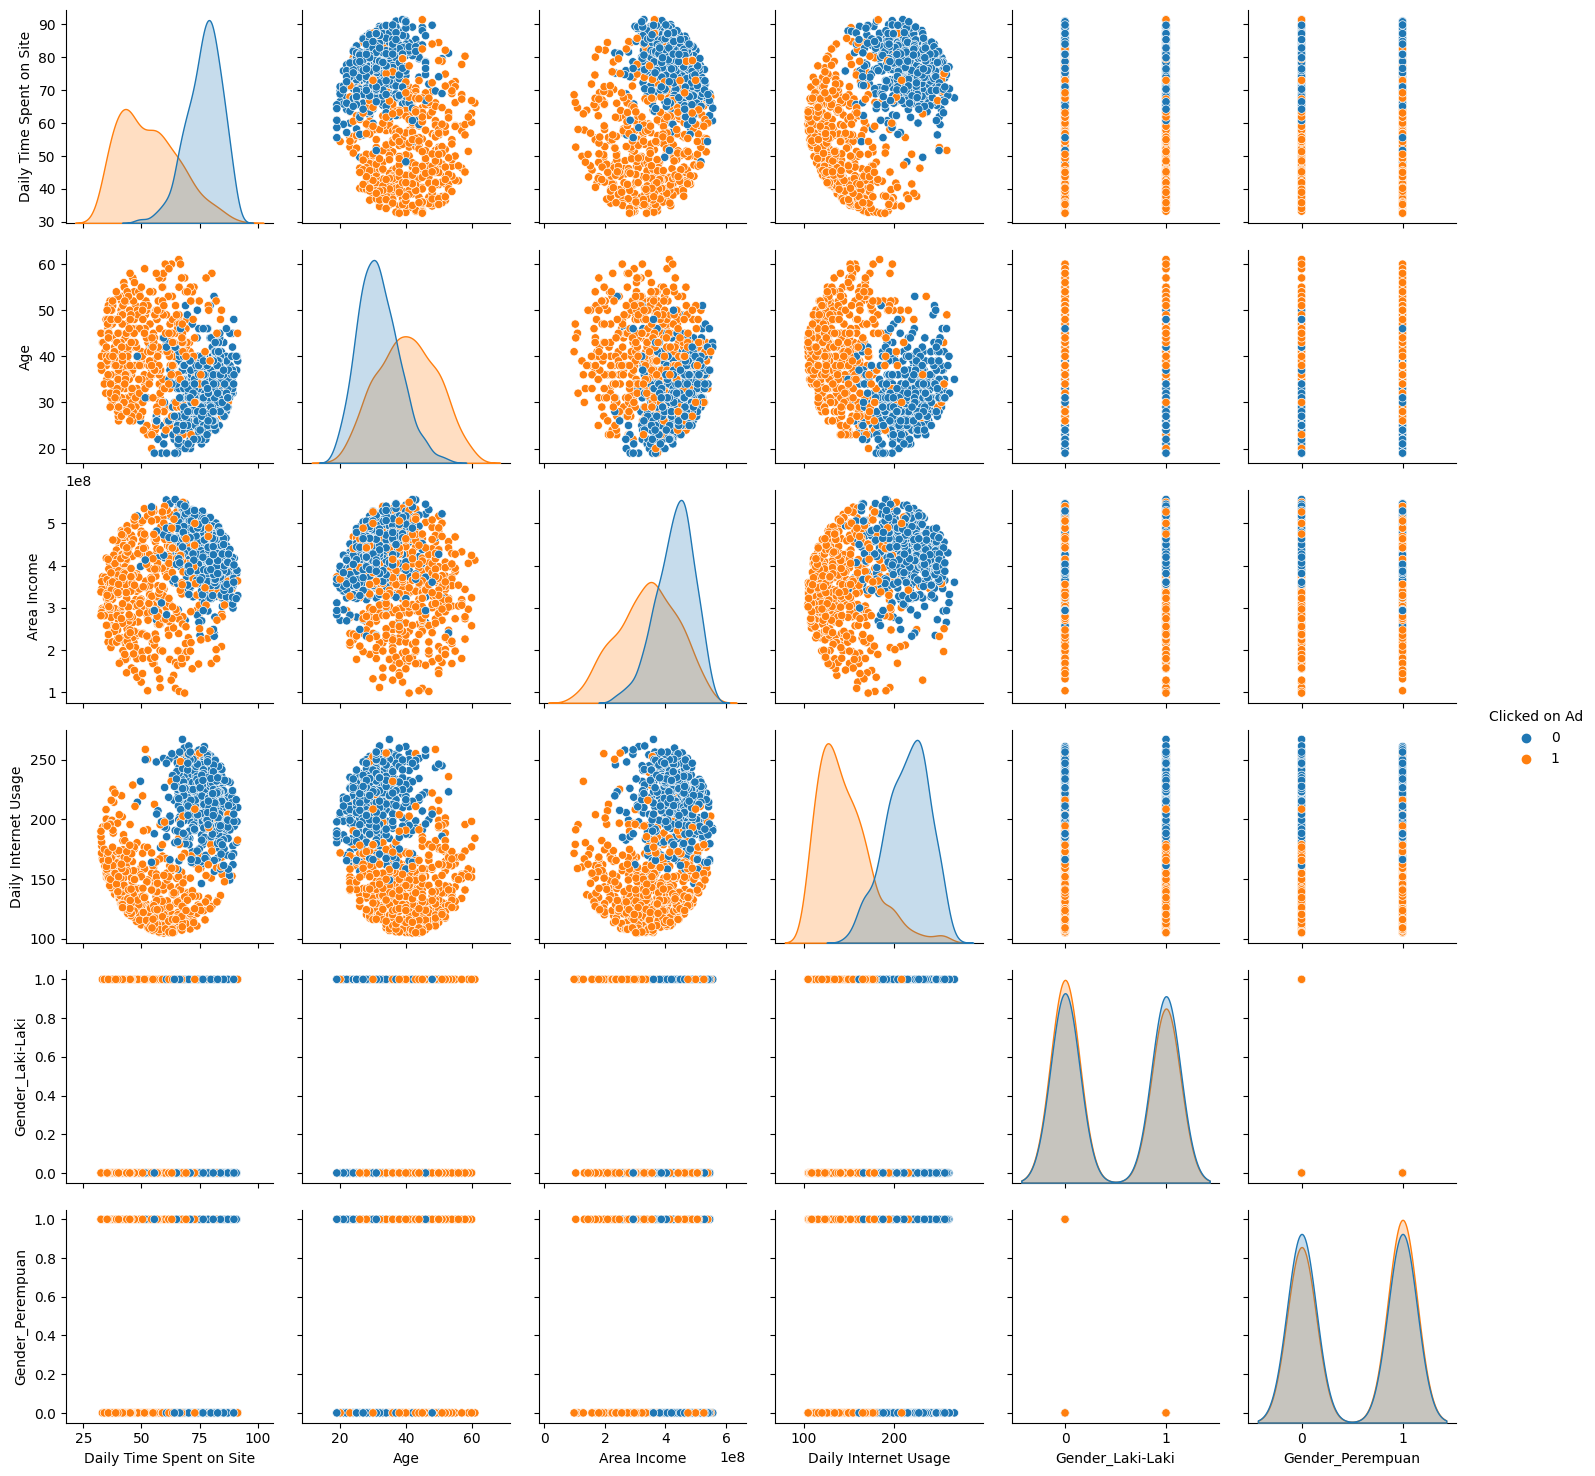

In [ ]:
sns.pairplot(df_copy, diag_kind='kde', hue = 'Clicked on Ad')

##**Data Cleaning & Preprocessing**

### Mengatasi data null dan duplicated

In [ ]:
# mengecek data null
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
# mengatasi data null
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Male'] = df['Male'].fillna(df['Male'].mode()[0])
df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

In [ ]:
# mengecek data duplikat
df.duplicated().sum()

0

In [ ]:
# mengecek jumlah baris dan kolom
df.shape

(1000, 11)

### Feature Encoding & ekstrasi kolom waktu

In [ ]:
# label encoding pada kolom Clicked on Ad
mapping_Clicked_on_Ad = { 'No' : 0, 'Yes' : 1 }
df['Clicked on Ad'] = df['Clicked on Ad'].map(mapping_Clicked_on_Ad)

# one hot encoding pada kolom Male
df_encoded  = pd.get_dummies(df['Male'], prefix='Gender')
df = pd.concat([df, df_encoded], axis=1)

# one hot encoding pada kolom category
df_encoded2  = pd.get_dummies(df['category'], prefix='category')
df = pd.concat([df, df_encoded2], axis=1)

# mengubah kolom Timestamp menjadi tipe datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# mengekstraksi tahun, bulan, pekan, dan hari ke dalam kolom baru
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week
df['Day'] = df['Timestamp'].dt.day

df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Gender_Laki-Laki,Gender_Perempuan,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Year,Month,Week,Day
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,0,1,0,0,0,0,0,1,0,0,0,0,2016,3,12,27
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,0,Denpasar,Bali,Food,1,0,0,0,0,0,1,0,0,0,0,0,2016,4,14,4
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,0,1,0,1,0,0,0,0,0,0,0,0,2016,3,10,13
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House,1,0,0,0,0,0,0,0,0,1,0,0,2016,1,1,10
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance,0,1,0,0,0,1,0,0,0,0,0,0,2016,6,22,3


### Membuang data yang tidak diperlukan

In [ ]:
# mengelompokan data
categoricals = df.select_dtypes(include='object').columns.tolist()
numericals = df.select_dtypes(include=('int64', 'float64')).columns.tolist()

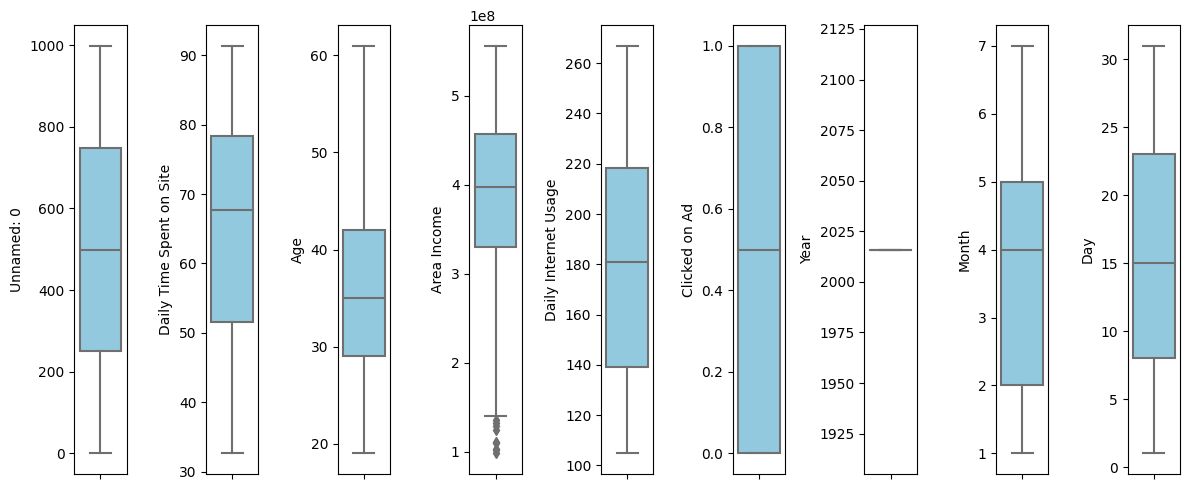

In [ ]:
# mencari outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

features = numericals

for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='skyblue', orient='v')
  plt.tight_layout()


plt.show()

In [ ]:
# menghapus outliers
df_clean= df[df['Area Income']<df['Area Income'].quantile(0.99)]

<ipython-input-25-17fb27d86e5f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), cmap='Blues', annot=True, fmt='.2f')


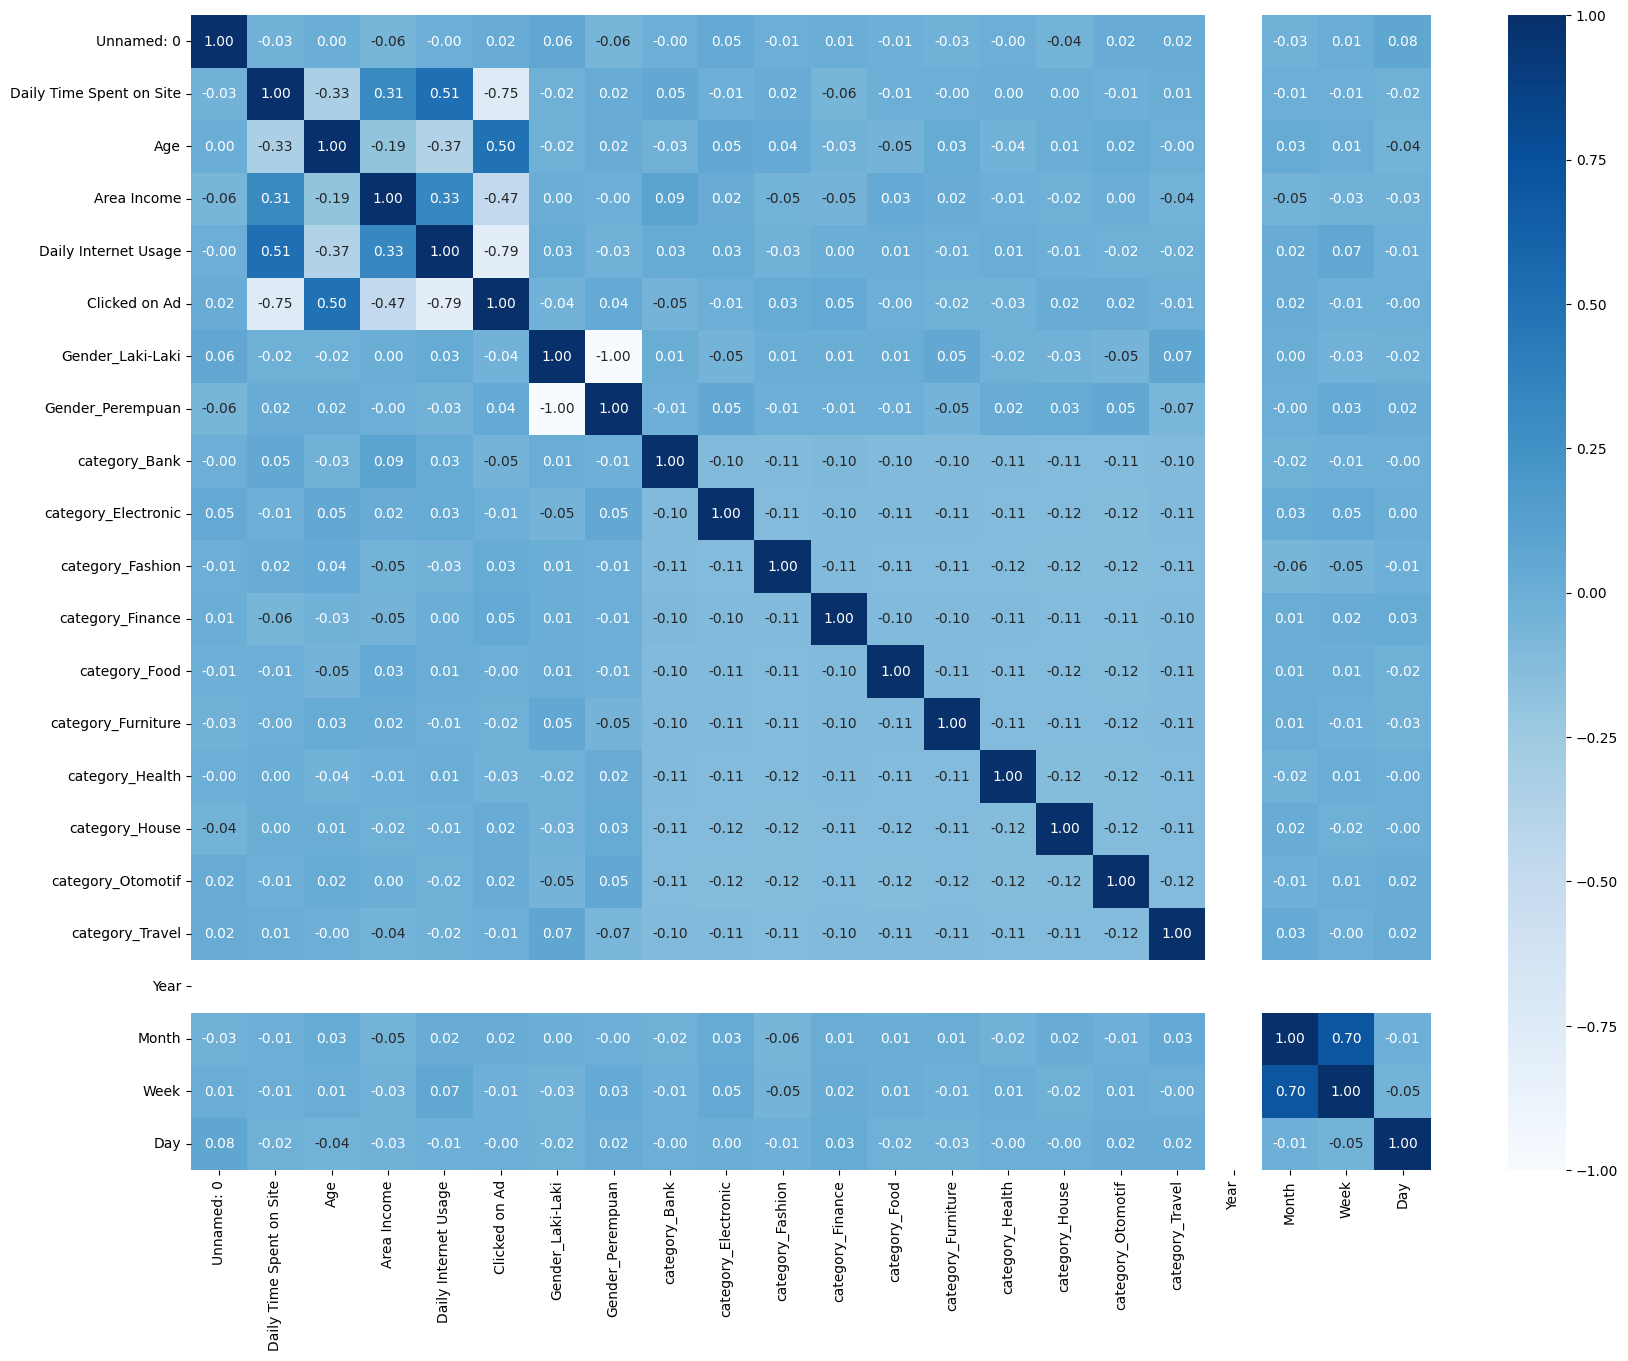

In [ ]:
# melihat kolerasi fitur dan target
plt.figure(figsize=(20,15))  # Atur ukuran gambar di sini (10 inch lebar, 8 inch tinggi)
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [ ]:
# membuang data yang tidak diperlukan
df_clean = df_clean.drop(['Unnamed: 0','Male', 'Timestamp', 'city', 'province', 'category', 'Week'], axis=1)
df_clean.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Gender_Laki-Laki,Gender_Perempuan,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel,Year,Month,Day
0,68.95,35,432837300.0,256.09,0,0,1,0,0,0,0,0,1,0,0,0,0,2016,3,27
1,80.23,31,479092950.0,193.77,0,1,0,0,0,0,0,1,0,0,0,0,0,2016,4,4
2,69.47,26,418501580.0,236.50,0,0,1,0,1,0,0,0,0,0,0,0,0,2016,3,13
3,74.15,29,383643260.0,245.89,0,1,0,0,0,0,0,0,0,0,1,0,0,2016,1,10
4,68.37,35,517229930.0,225.58,0,0,1,0,0,0,1,0,0,0,0,0,0,2016,6,3


### Split Data

In [ ]:
# Modeling yang belum di standarisasi
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y) dari dataset
X = df_clean.drop(columns=['Clicked on Ad'])
y = df_clean['Clicked on Ad']
# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## **Data Modeling**

### Standarisasi Feature

In [ ]:
# Modeling yang  di standarisasi
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y) dari dataset
X2 = df_clean.drop(columns=['Clicked on Ad'])
y2 = df_clean['Clicked on Ad']
# Memisahkan data menjadi data pelatihan dan data pengujian
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Menghitung rata-rata dan deviasi standar dari kolom-kolom X2
scaler.fit(X2_train)

# Standarisasi kolom-kolom X2 pada data pelatihan
X2_train = scaler.transform(X2_train)

# Standarisasi kolom-kolom X2 pada data pengujian
X2_test = scaler.transform(X2_test)

### Training Model

#### Model 1 : RandomForest

##### Tanpa standarisasi

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest untuk klasifikasi
model_rf_classification = RandomForestClassifier(n_estimators=266,
                                                min_samples_split=2,
                                                min_samples_leaf=1,
                                                max_features='sqrt',
                                                max_depth=30,
                                                bootstrap=True,
                                                random_state=42)

# Fit model
model_rf_classification.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=266, random_state=42)

Akurasi: 94.28%
Rata-rata Precision: 0.94
Rata-rata Recall: 0.94
Rata-rata F1-score: 0.94


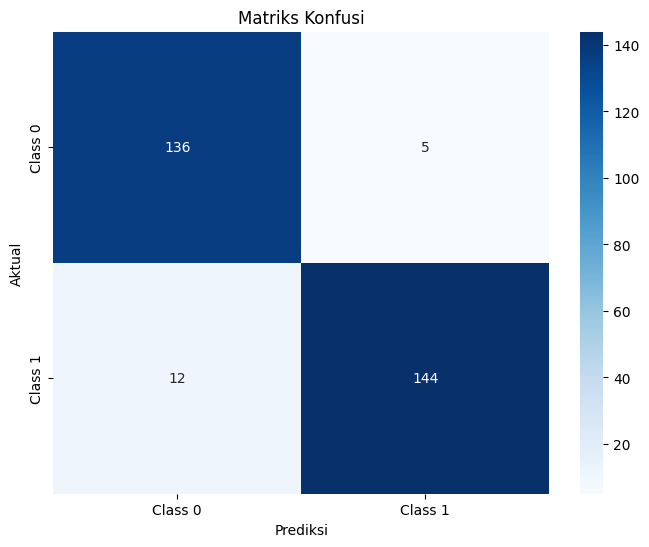

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y_pred = model_rf_classification.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg = report['macro avg']['precision']
recall_avg = report['macro avg']['recall']
f1_score_avg = report['macro avg']['f1-score']
accuracy = report['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg))
print("Rata-rata Recall: {:.2f}".format(recall_avg))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg))

# Menghitung matriks konfusi
confusion_mat = confusion_matrix(y_test, y_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
scores = cross_val_score(model_rf_classification, X_train, y_train, cv=5)

# Mencetak skor cross-validation secara rapi
for i, score in enumerate(scores, start=1):
    print(f"Fold-{i}: {score:.2f}")

print(f"Rata-rata: {scores.mean():.2f}")

Fold-1: 0.97
Fold-2: 0.96
Fold-3: 0.99
Fold-4: 0.96
Fold-5: 0.99
Rata-rata: 0.97


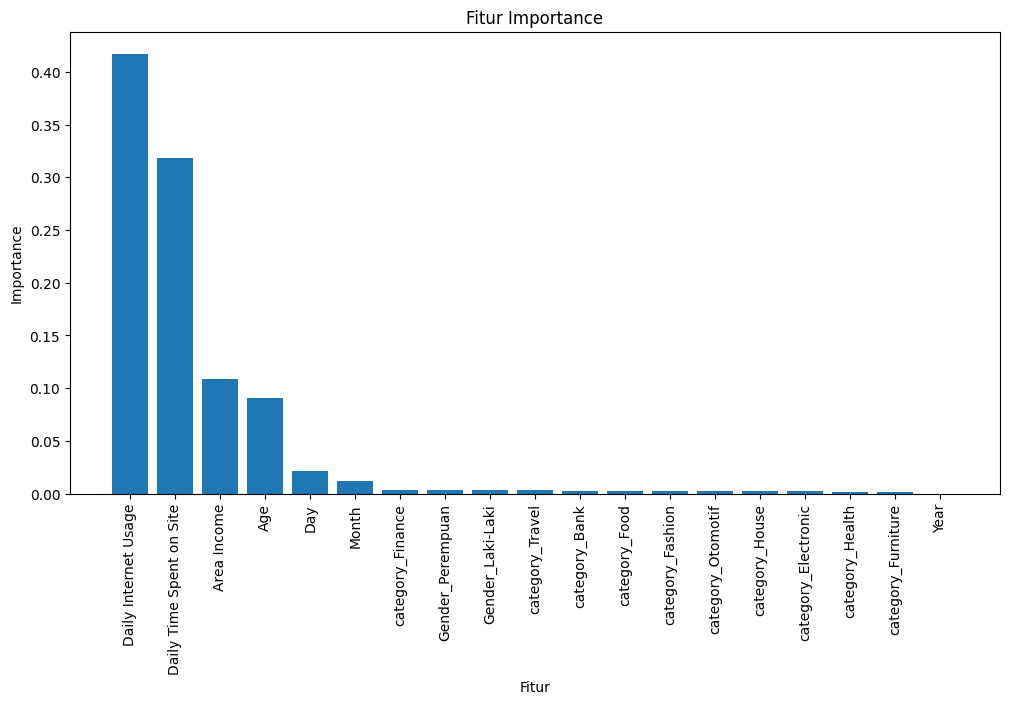

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan nama fitur (kolom) dari data
feature_names = X_train.columns

# Mendapatkan tingkat penting dari fitur-fitur
importances = model_rf_classification.feature_importances_

# Mengurutkan fitur importance secara menurun
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Membuat grafik batang fitur importance
plt.figure(figsize=(12, 6))
plt.title("Fitur Importance")
plt.bar(range(len(sorted_feature_names)), importances[indices], align="center")
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Importance")
plt.show()

##### Dengan standarisasi

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest untuk klasifikasi
model_rf_classification_std = RandomForestClassifier(n_estimators=266,
                                                min_samples_split=2,
                                                min_samples_leaf=1,
                                                max_features='sqrt',
                                                max_depth=30,
                                                bootstrap=True,
                                                random_state=42)

# Fit model
model_rf_classification_std.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=30, n_estimators=266, random_state=42)

Akurasi: 94.28%
Rata-rata Precision: 0.94
Rata-rata Recall: 0.94
Rata-rata F1-score: 0.94


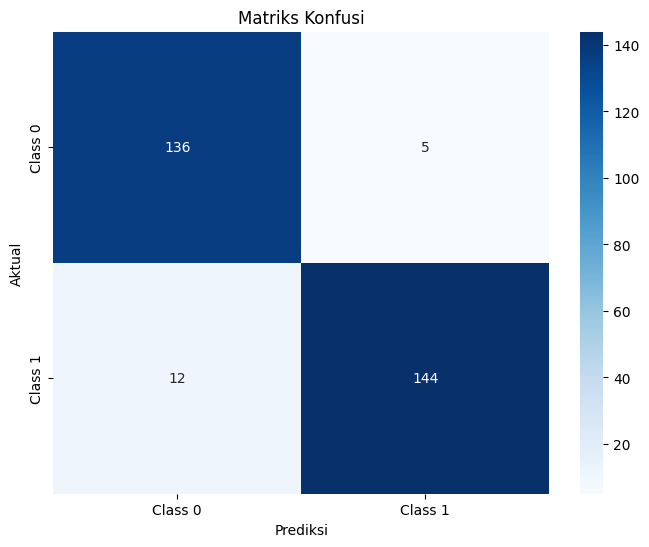

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediksi hasil pada data pengujian
y2_pred = model_rf_classification_std.predict(X2_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report2 = classification_report(y2_test, y2_pred, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg2 = report2['macro avg']['precision']
recall_avg2 = report2['macro avg']['recall']
f1_score_avg2 = report2['macro avg']['f1-score']
accuracy2 = report2['accuracy']

# Mencetak hasil
print("Akurasi: {:.2f}%".format(accuracy2 * 100))
print("Rata-rata Precision: {:.2f}".format(precision_avg2))
print("Rata-rata Recall: {:.2f}".format(recall_avg2))
print("Rata-rata F1-score: {:.2f}".format(f1_score_avg2))

# Menghitung matriks konfusi
confusion_mat2 = confusion_matrix(y2_test, y2_pred)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat2, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
scores2 = cross_val_score(model_rf_classification_std, X2_train, y2_train, cv=5)

# Mencetak skor cross-validation secara rapi
for i, score2 in enumerate(scores2, start=1):
    print(f"Fold-{i}: {score2:.2f}")

print(f"Rata-rata: {scores2.mean():.2f}")

Fold-1: 0.97
Fold-2: 0.96
Fold-3: 0.99
Fold-4: 0.96
Fold-5: 0.99
Rata-rata: 0.97


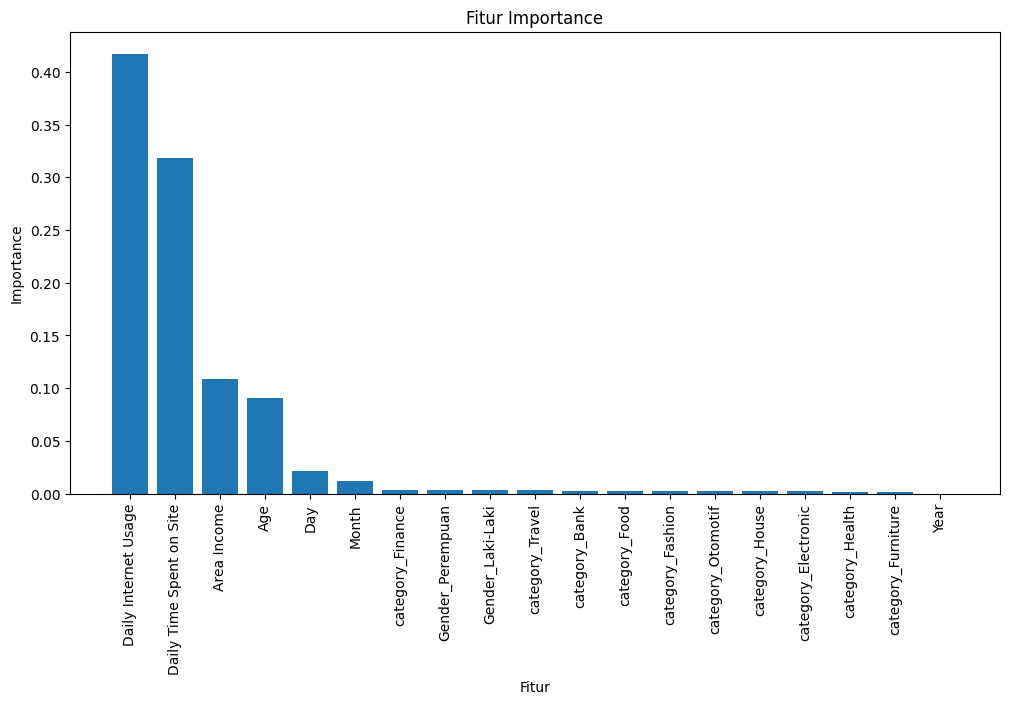

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan nama fitur (kolom) dari data
feature_names2 = X2.columns

# Mendapatkan tingkat penting dari fitur-fitur
importances2 = model_rf_classification_std.feature_importances_

# Mengurutkan fitur importance secara menurun
indices2 = importances2.argsort()[::-1]
sorted_feature_names2 = [feature_names2[i] for i in indices2]

# Membuat grafik batang fitur importance
plt.figure(figsize=(12, 6))
plt.title("Fitur Importance")
plt.bar(range(len(sorted_feature_names2)), importances2[indices2], align="center")
plt.xticks(range(len(sorted_feature_names2)), sorted_feature_names2, rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Importance")
plt.show()

#### Model 2 : GradientBoosting

##### Tanpa standarisasi

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting untuk klasifikasi
model_gb_classification = GradientBoostingClassifier(n_estimators=100,
                                                     learning_rate=0.1,
                                                     max_depth=3,
                                                     random_state=42)

# Fit model
model_gb_classification.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Akurasi Gradient Boosting: 93.60%
Rata-rata Precision Gradient Boosting: 0.94
Rata-rata Recall Gradient Boosting: 0.94
Rata-rata F1-score Gradient Boosting: 0.94


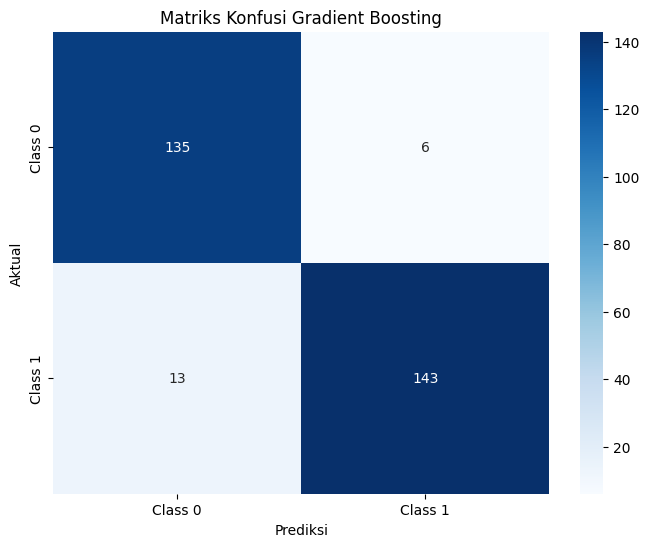

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi hasil pada data pengujian
y_pred_gb = model_gb_classification.predict(X_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg_gb = report_gb['macro avg']['precision']
recall_avg_gb = report_gb['macro avg']['recall']
f1_score_avg_gb = report_gb['macro avg']['f1-score']
accuracy_gb = report_gb['accuracy']

# Mencetak hasil
print("Akurasi Gradient Boosting: {:.2f}%".format(accuracy_gb * 100))
print("Rata-rata Precision Gradient Boosting: {:.2f}".format(precision_avg_gb))
print("Rata-rata Recall Gradient Boosting: {:.2f}".format(recall_avg_gb))
print("Rata-rata F1-score Gradient Boosting: {:.2f}".format(f1_score_avg_gb))

# Menghitung matriks konfusi
confusion_mat_gb = confusion_matrix(y_test, y_pred_gb)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi Gradient Boosting")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
scores = cross_val_score(model_gb_classification, X_train, y_train, cv=5)

# Mencetak skor cross-validation secara rapi
for i, score in enumerate(scores, start=1):
    print(f"Fold-{i}: {score:.2f}")

print(f"Rata-rata: {scores.mean():.2f}")

Fold-1: 0.95
Fold-2: 0.96
Fold-3: 0.96
Fold-4: 0.96
Fold-5: 0.98
Rata-rata: 0.96


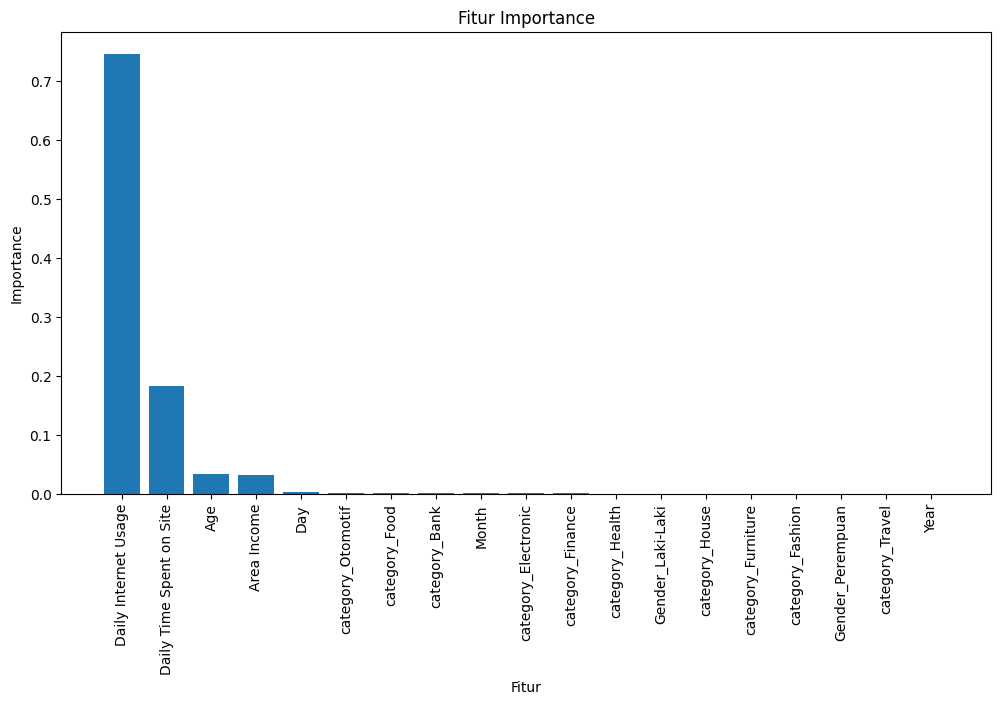

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan nama fitur (kolom) dari data
feature_names = X_train.columns

# Mendapatkan tingkat penting dari fitur-fitur
importances = model_gb_classification.feature_importances_

# Mengurutkan fitur importance secara menurun
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Membuat grafik batang fitur importance
plt.figure(figsize=(12, 6))
plt.title("Fitur Importance")
plt.bar(range(len(sorted_feature_names)), importances[indices], align="center")
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Importance")
plt.show()

##### Dengan standarisasi

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model Gradient Boosting untuk klasifikasi
model_gb_classification_std = GradientBoostingClassifier(n_estimators=100,
                                                     learning_rate=0.1,
                                                     max_depth=3,
                                                     random_state=42)

# Fit model
model_gb_classification_std.fit(X2_train, y2_train)

GradientBoostingClassifier(random_state=42)

Akurasi Gradient Boosting: 93.27%
Rata-rata Precision Gradient Boosting: 0.93
Rata-rata Recall Gradient Boosting: 0.93
Rata-rata F1-score Gradient Boosting: 0.93


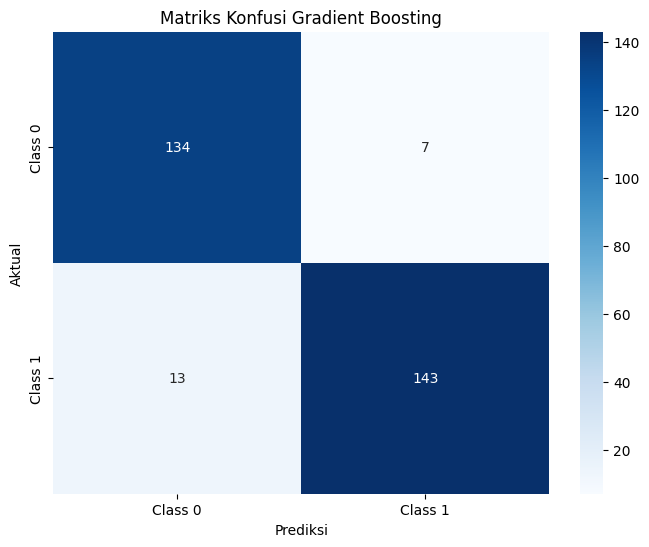

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi hasil pada data pengujian
y_pred_gb2 = model_gb_classification_std.predict(X2_test)

# Membuat laporan klasifikasi dalam bentuk dictionary
report_gb2 = classification_report(y2_test, y_pred_gb2, output_dict=True)

# Mengambil metrik rata-rata dari dictionary
precision_avg_gb2 = report_gb2['macro avg']['precision']
recall_avg_gb2 = report_gb2['macro avg']['recall']
f1_score_avg_gb2 = report_gb2['macro avg']['f1-score']
accuracy_gb2 = report_gb2['accuracy']

# Mencetak hasil
print("Akurasi Gradient Boosting: {:.2f}%".format(accuracy_gb2 * 100))
print("Rata-rata Precision Gradient Boosting: {:.2f}".format(precision_avg_gb2))
print("Rata-rata Recall Gradient Boosting: {:.2f}".format(recall_avg_gb2))
print("Rata-rata F1-score Gradient Boosting: {:.2f}".format(f1_score_avg_gb2))

# Menghitung matriks konfusi
confusion_mat_gb2 = confusion_matrix(y2_test, y_pred_gb2)

# Membuat plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_gb2, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi Gradient Boosting")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Menggunakan cross-validation
scores2 = cross_val_score(model_gb_classification_std, X2_train, y2_train, cv=5)

# Mencetak skor cross-validation secara rapi
for i, score2 in enumerate(scores2, start=1):
    print(f"Fold-{i}: {score2:.2f}")

print(f"Rata-rata: {scores2.mean():.2f}")

Fold-1: 0.95
Fold-2: 0.96
Fold-3: 0.96
Fold-4: 0.96
Fold-5: 0.98
Rata-rata: 0.96


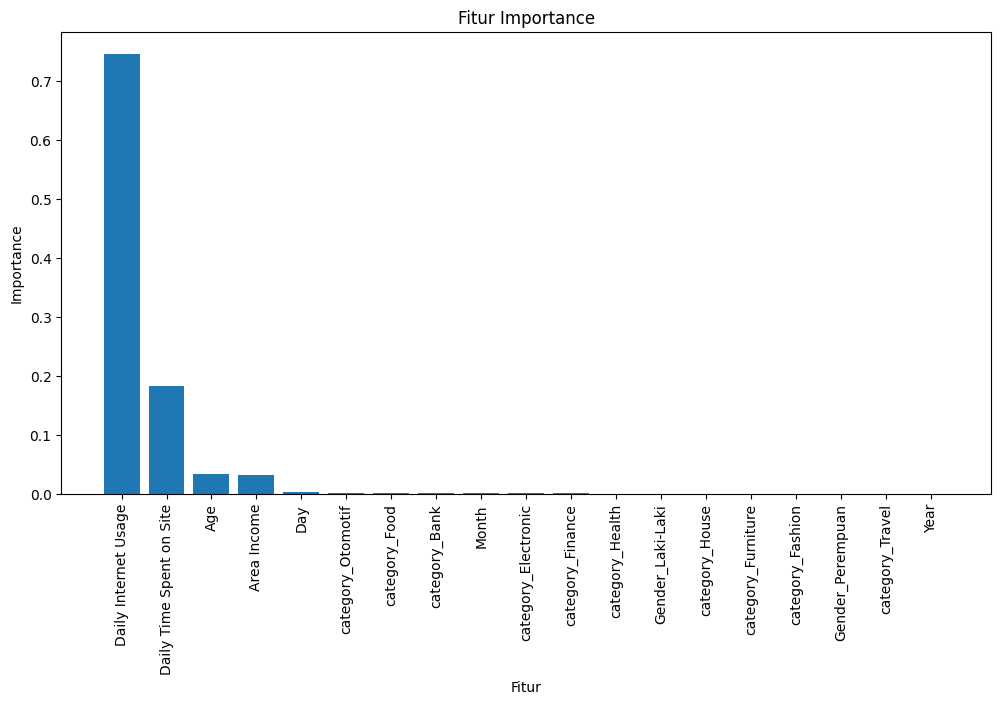

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan nama fitur (kolom) dari data
feature_names2 = X2.columns

# Mendapatkan tingkat penting dari fitur-fitur
importances2 = model_gb_classification_std.feature_importances_

# Mengurutkan fitur importance secara menurun
indices2 = importances2.argsort()[::-1]
sorted_feature_names2 = [feature_names2[i] for i in indices2]

# Membuat grafik batang fitur importance
plt.figure(figsize=(12, 6))
plt.title("Fitur Importance")
plt.bar(range(len(sorted_feature_names2)), importances2[indices], align="center")
plt.xticks(range(len(sorted_feature_names2)), sorted_feature_names2, rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Importance")
plt.show()

## **Business Recommendation and Simulation**


### rekomendasi bisnis berdasarkan feature important

- Berdasarkan EDA kami mendapatkan 2 segment pelanggan. Segment pertama yaitu pengguna aktif, segment pengguna aktif memiliki ciri-ciri memiliki sering menggunakan internet dan mengunjungi suatu halaman website. Sementara segment kedua adalah pengguna tidak aktif, segment ini memiliki ciri-ciri yang berkebalikan dengan segment pertama

- Jika dirangkum usia menengah, merupakan pelanggan tidak aktif, dan rentang income upper middle cendrung lebih tertarik dalam meng-click iklan. Sementara untuk usia muda sampai menengah awal, merupakan pelanggan aktif dan memiliki rentang income upper class cenderung tidak meng-clik iklan


### Simulasi Bisnis Tanpa Machine Learning

In [ ]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

**Target Variabel: Clicked on Ad**

**Asumsi :**
- Anggaran pengiklanan masing masing konsumen adalah Rp. 1500
- Jika diasumsikan kita mengimplementasikan simulasi menggunakan dataset awal dengan jumlah konsumen sebesar 1000 orang. Dan masing-masing segment berisikan 500 orang.
- Setiap pengguna yang mengkonversi, maka akan menghasilkan pendapatan sebesar Rp. 5000
- Tingkat konversion rate sebesar 50 %, karena hanya 500 orang yang mengklik iklan

**Perhitungan CTR** : <br>
- CTR = (jumlah click : jumlah tayangan) * 100 <br>
CTR = (500 : 1000) * 100 <br>
CTR = 50% <br>

**Perhitungan Cost** : <br>
- Cost = biaya iklan * jumlah pengguna <br>
Cost = 1000 * 1500 <br>
Cost = 1500000 <br>

**Perhitungan Revenue** : <br>
- Revenue  = (conversion rate * jumlah pengguna) * pendapatan <br>
Revenue  = (50% * 1000) * 5000 <br>
Revenue  = 2500000 <br>

**Perhitungan EPS** : <br>
- EPS = Revenue / Clicks <br>
EPS = 2500000 /500 <br>
EPS = 5000 <br>

**Perhitungan Profit** : <br>
- Profit = Revenue - Cost <br>
Profit = 2500000 - 1500000 <br>
Profit = 1000000 <br>

Berdasarkan simulasi di atas, jika tidak menggunakan model machine learning maka akan mendapatkan Pendapatan sebesar 1000000


### Simulasi Bisnis Dengan Machine Learning

Berdasarkan kinerja model, model yang telah disepakati mendapatkan akurasi hasil pengujian sebesar 94.28%, sehingga jika diterapkan pada dataset awal,  akan mendapatkan 942 pengguna yang melakukan konversi.

**Perhitungan CTR** : <br>
- CTR = (jumlah click : jumlah tayangan) * 100 <br>
CTR = (942 : 1000) * 100 <br>
CTR = 94,2% <br>

**Perhitungan Cost** : <br>
- Cost = biaya iklan * jumlah pengguna <br>
Cost = 1000 * 1500 <br>
Cost = 1500000 <br>

**Perhitungan Revenue** : <br>
- Revenue  = (conversion rate * jumlah pengguna) * pendapatan <br>
Revenue  = (94,28% * 1000) *  5000 <br>
Revenue  = 4710000 <br>

**Perhitungan EPS** : <br>
- EPS = Revenue / Clicks <br>
EPS = 4710000 /942 <br>
EPS = 5000 <br>

**Perhitungan Profit** : <br>
- Profit = Revenue - Cost <br>
Profit = 4710000- 1500000 <br>
Profit = 3210000 <br>

Berdasarkan simulasi di atas, jika kita tidak menggunakan model pembelajaran mesin, maka kita akan mendapatkan pendapatan 1 juta dan dengan penggunaan ML pendapatan meningkat secara signifikan lebih dari tiga kali lipat. <br>

**Kesimpulannya, Machine Learning dapat bekerja dengan baik untuk meningkatkan pendapatan.**
